# Bootcamp Engenheiro(a) de Machine Learning

## Módulo 1 - Fundamentos de Aprendizado de Máquinas

## Predicting Wine Quality with Several Classification Techniques

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix


In [2]:
# Data Reading

df = pd.read_csv('winequality-red.csv', sep=';')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


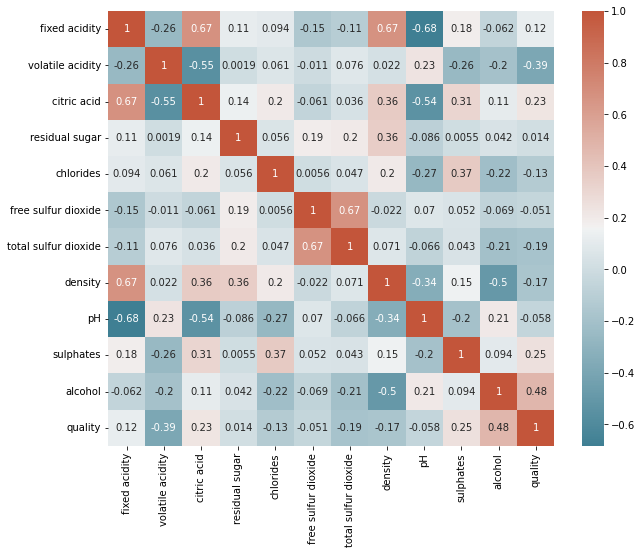

In [3]:
# Exploratory Data Analysis

# Dataframe
display(df)

# Generate descriptive statistics
display(df.describe())

# Concise summary
display(df.info())

# Missing values
print(df.isna().sum())

# Correlation matrix
corr = df.corr()
plt.subplots(figsize=(10,8));
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True));


In [4]:
# Preprocessing

entrada = df.iloc[:, 0:11]
saida = df['quality']

scaler = MinMaxScaler()
entrada_normalizada = scaler.fit_transform(entrada)

X_train, X_test, y_train, y_true = train_test_split(entrada_normalizada, saida, test_size=0.30, random_state=1)


In [5]:
# Models

# KNeighborns
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
KNN_y_test = clf_KNN.predict(X_test)

# Decision Tree
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)
arvore_y_test = clf_arvore.predict(X_test)

# Random Forest
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
floresta_y_test = clf_floresta.predict(X_test)

# Support Vector Machines
clf_svm=SVC(gamma='auto', kernel='rbf')
clf_svm.fit(X_train, y_train)
svm_y_test = clf_svm.predict(X_test)

# Multilayer Perceptron
clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1, max_iter=1000)
clf_mlp.fit(X_train, y_train)
mlp_y_test = clf_mlp.predict(X_test)


The KNN Accuracy Score is 0.565
The Decision Tree Accuracy Score is 0.594
The Random Forest Accuracy Score is 0.679
The SVM Accuracy Score is 0.585
The MLP Accuracy Score is 0.6


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

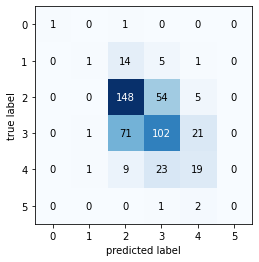

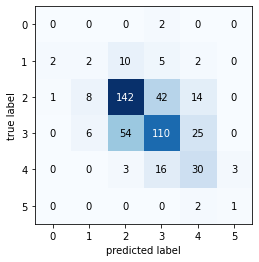

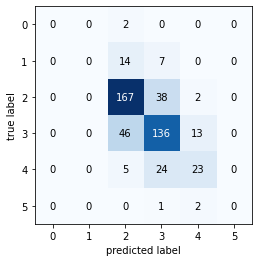

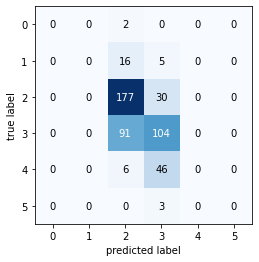

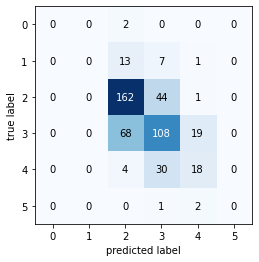

In [6]:
# Metrics

# KNeighborns
#print(classification_report(y_true, KNN_y_test))
print('The KNN Accuracy Score is', round(accuracy_score(y_true, KNN_y_test), 3))

KNN_cfm = confusion_matrix(y_true, KNN_y_test)
plot_confusion_matrix(KNN_cfm)

# Decision Tree
#print(classification_report(y_true, arvore_y_test))
print('The Decision Tree Accuracy Score is', round(accuracy_score(y_true, arvore_y_test), 3))

arvore_cfm = confusion_matrix(y_true, arvore_y_test)
plot_confusion_matrix(arvore_cfm)

# Random Forest
#print(classification_report(y_true, floresta_y_test))
print('The Random Forest Accuracy Score is', round(accuracy_score(y_true, floresta_y_test), 3))

floresta_cfm = confusion_matrix(y_true, floresta_y_test)
plot_confusion_matrix(floresta_cfm)

# Support Vector Machines
#print(classification_report(y_true, svm_y_test))
print('The SVM Accuracy Score is', round(accuracy_score(y_true, svm_y_test), 3))

svm_cfm = confusion_matrix(y_true, svm_y_test)
plot_confusion_matrix(svm_cfm)

# Multilayer Perceptron
#print(classification_report(y_true, mlp_y_test))
print('The MLP Accuracy Score is', round(accuracy_score(y_true, mlp_y_test), 3))

mlp_cfm = confusion_matrix(y_true, mlp_y_test)
plot_confusion_matrix(mlp_cfm)


In [7]:
# Another Analysis

# Preprocessing

df_modify = df.copy()
df_modify.loc[df_modify.quality <= 5, 'quality'] = 0
df_modify.loc[df_modify.quality > 5, 'quality'] = 1

display(df_modify)

entrada = df_modify.iloc[:, 0:11]
saida = df_modify['quality']

scaler = MinMaxScaler()
entrada_normalizada = scaler.fit_transform(entrada)

X_train, X_test, y_train, y_true = train_test_split(entrada_normalizada, saida, test_size=0.30, random_state=1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [8]:
# Models

# KNeighborns
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
KNN_y_test = clf_KNN.predict(X_test)

# Decision Tree
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)
arvore_y_test = clf_arvore.predict(X_test)

# Random Forest
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
floresta_y_test = clf_floresta.predict(X_test)

# Support Vector Machines
clf_svm=SVC(gamma='auto', kernel='rbf')
clf_svm.fit(X_train, y_train)
svm_y_test = clf_svm.predict(X_test)

# Multilayer Perceptron
clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1, max_iter=1000)
clf_mlp.fit(X_train, y_train)
mlp_y_test = clf_mlp.predict(X_test)


The KNN Accuracy Score is 0.696
The Decision Tree Accuracy Score is 0.76
The Random Forest Accuracy Score is 0.804
The SVM Accuracy Score is 0.746
The MLP Accuracy Score is 0.748


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

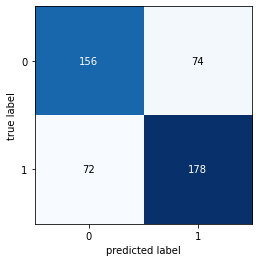

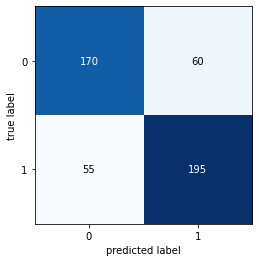

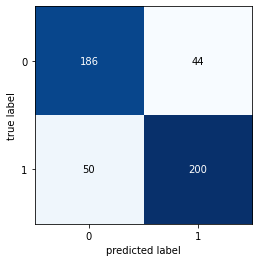

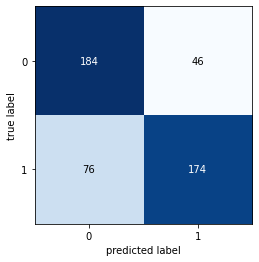

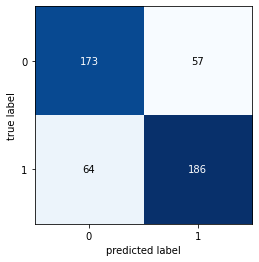

In [9]:
# Metrics

# KNeighborns
#print(classification_report(y_true, KNN_y_test))
print('The KNN Accuracy Score is', round(accuracy_score(y_true, KNN_y_test), 3))

KNN_cfm = confusion_matrix(y_true, KNN_y_test)
plot_confusion_matrix(KNN_cfm)

# Decision Tree
#print(classification_report(y_true, arvore_y_test))
print('The Decision Tree Accuracy Score is', round(accuracy_score(y_true, arvore_y_test), 3))

arvore_cfm = confusion_matrix(y_true, arvore_y_test)
plot_confusion_matrix(arvore_cfm)

# Random Forest
#print(classification_report(y_true, floresta_y_test))
print('The Random Forest Accuracy Score is', round(accuracy_score(y_true, floresta_y_test), 3))

floresta_cfm = confusion_matrix(y_true, floresta_y_test)
plot_confusion_matrix(floresta_cfm)

# Support Vector Machines
#print(classification_report(y_true, svm_y_test))
print('The SVM Accuracy Score is', round(accuracy_score(y_true, svm_y_test), 3))

svm_cfm = confusion_matrix(y_true, svm_y_test)
plot_confusion_matrix(svm_cfm)

# Multilayer Perceptron
#print(classification_report(y_true, mlp_y_test))
print('The MLP Accuracy Score is', round(accuracy_score(y_true, mlp_y_test), 3))

mlp_cfm = confusion_matrix(y_true, mlp_y_test)
plot_confusion_matrix(mlp_cfm)
